In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("sample_traffic_accident_data.csv")

In [3]:
# Display the first few rows of the dataset
print("Data Preview:\n", data.head())


Data Preview:
    Accident_ID        Date      Time Day_of_Week         City State  \
0            1  2024-01-01  00:00:00      Monday     New York    CA   
1            2  2024-01-02  00:05:00    Thursday      Chicago    CA   
2            3  2024-01-03  00:10:00    Thursday      Chicago    TX   
3            4  2024-01-04  00:15:00    Thursday     New York    CA   
4            5  2024-01-05  00:20:00      Sunday  Los Angeles    TX   

      Road_Type Accident_Severity Weather_Conditions Visibility  ...  \
0        Street             Major              Clear       Poor  ...   
1       Highway             Fatal              Rainy       Poor  ...   
2  Intersection             Fatal              Rainy   Moderate  ...   
3  Intersection             Major              Clear   Moderate  ...   
4        Street             Major              Snowy   Moderate  ...   

  Vehicle_Count Vehicle_Speed Driver_Age  Driver_Gender  Impairment  \
0             4           108         61         Femal

In [4]:
# Data Cleaning (Removing null values, duplicates, etc.)
data = data.dropna()  # Drop rows with missing values
data = data.drop_duplicates()  # Remove duplicate entries


In [5]:
# Data Summary
print("\nSummary Statistics:\n", data.describe())



Summary Statistics:
        Accident_ID  Vehicle_Count  Vehicle_Speed  Driver_Age  Injury_Count  \
count   100.000000     100.000000     100.000000  100.000000    100.000000   
mean     50.500000       2.520000      68.890000   46.090000      1.980000   
std      29.011492       1.176195      29.689945   16.297174      1.428286   
min       1.000000       1.000000      21.000000   18.000000      0.000000   
25%      25.750000       1.000000      43.000000   34.000000      1.000000   
50%      50.500000       3.000000      72.500000   45.000000      2.000000   
75%      75.250000       4.000000      96.000000   59.000000      3.000000   
max     100.000000       4.000000     119.000000   75.000000      4.000000   

       Fatality_Count  
count      100.000000  
mean         0.540000  
std          0.500908  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


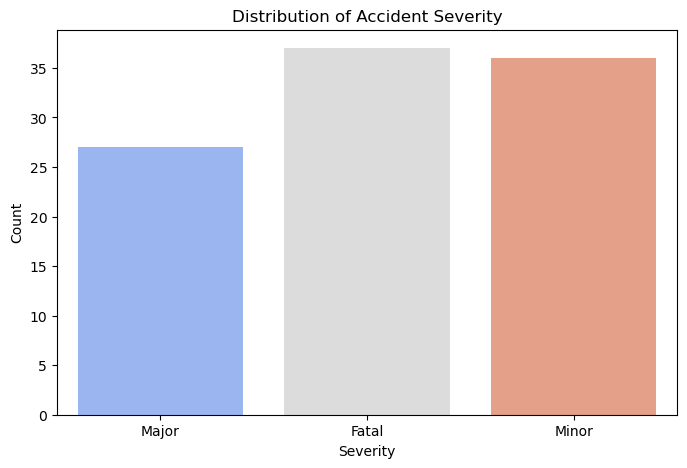

In [6]:
# Exploratory Data Analysis (EDA)
# 1. Accident Severity Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Accident_Severity', data=data, palette="coolwarm")
plt.title("Distribution of Accident Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

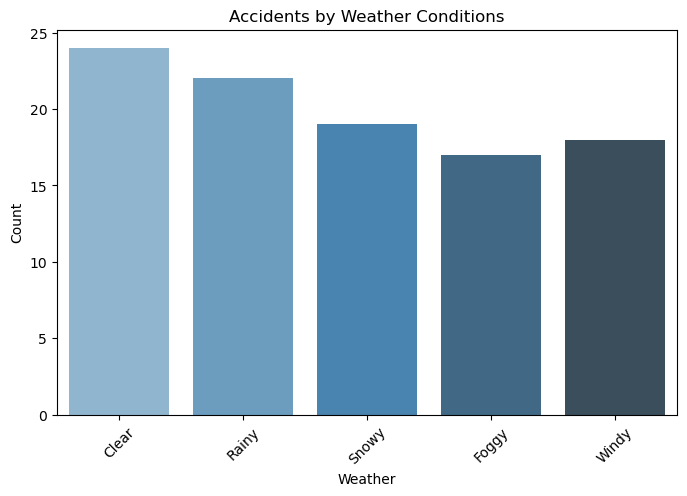

In [7]:
# 2. Accidents by Weather Conditions
plt.figure(figsize=(8, 5))
sns.countplot(x='Weather_Conditions', data=data, palette="Blues_d")
plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

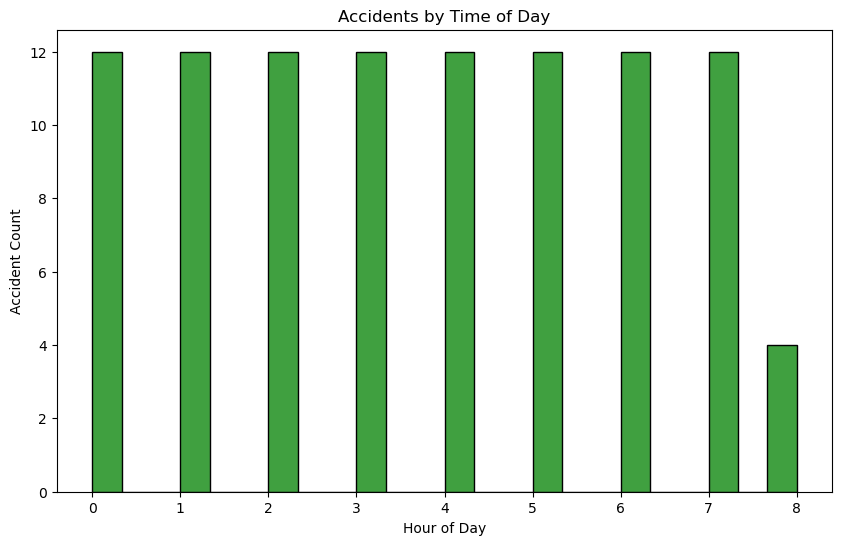

In [8]:
# 3. Accidents by Time of Day
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data['Hour'] = data['Time'].dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data['Hour'], bins=24, kde=False, color='green')
plt.title("Accidents by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Accident Count")
plt.show()

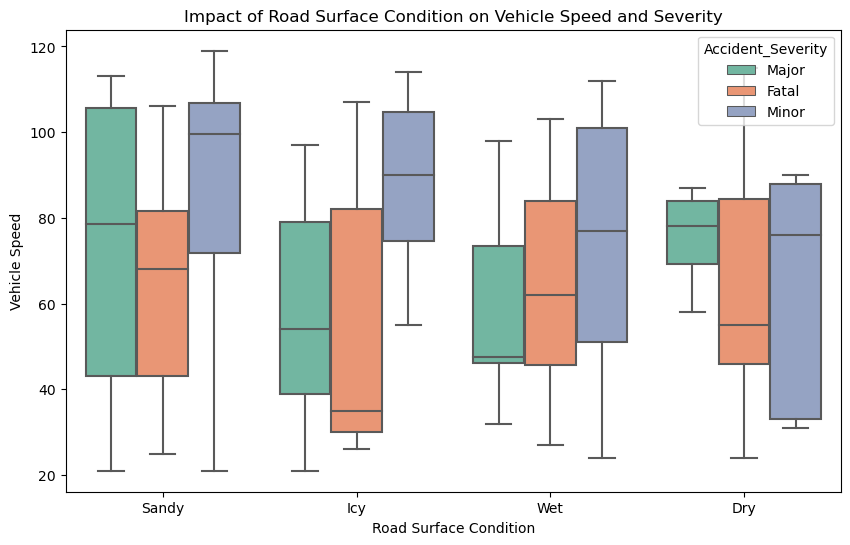

In [9]:
# 4. Impact of Road Surface Condition on Accident Severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Road_Surface_Condition', y='Vehicle_Speed', hue='Accident_Severity', data=data, palette="Set2")
plt.title("Impact of Road Surface Condition on Vehicle Speed and Severity")
plt.xlabel("Road Surface Condition")
plt.ylabel("Vehicle Speed")
plt.show()

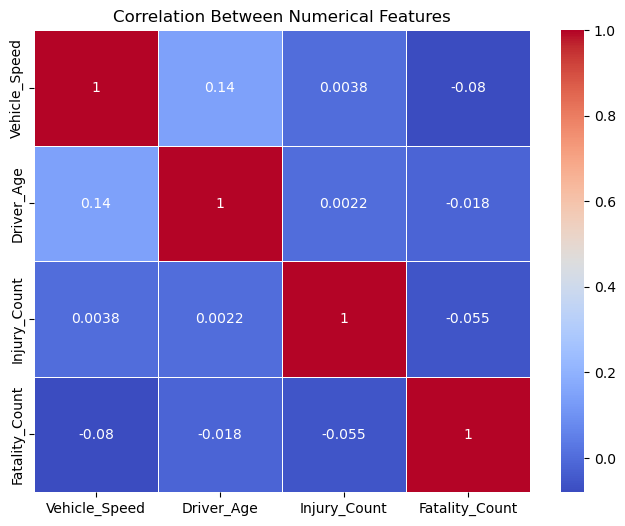

In [10]:
# 5. Correlation Heatmap
corr_matrix = data[['Vehicle_Speed', 'Driver_Age', 'Injury_Count', 'Fatality_Count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Numerical Features")
plt.show()

In [12]:
# Generate a Summary Report
summary = data.groupby('Accident_Severity').agg({
    'Accident_ID': 'count',
    'Vehicle_Count': 'mean',
    'Vehicle_Speed': 'mean',
    'Injury_Count': 'sum',
    'Fatality_Count': 'sum'
}).reset_index()
print("\nSummary Report:\n", summary)



Summary Report:
   Accident_Severity  Accident_ID  Vehicle_Count  Vehicle_Speed  Injury_Count  \
0             Fatal           37       2.594595      62.081081            72   
1             Major           27       2.629630      64.962963            46   
2             Minor           36       2.361111      78.833333            80   

   Fatality_Count  
0              22  
1              14  
2              18  
